# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju
**Nama:** Nicholas Rayden


**Email:**  nicholasrayden@gmail.com


**ID Dicoding:**  


## 1. Persiapan

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("/content/employee_data.csv")

In [49]:
df_original = df.copy()

In [50]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## 2. Data Understanding

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [52]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [53]:
df.nunique()

,0
EmployeeId,1470
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


In [54]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [55]:
print("Jumlah missing values di kolom Attrition:", df['Attrition'].isnull().sum())

Jumlah missing values di kolom Attrition: 412


In [56]:
df = df.dropna(subset=['Attrition'])
df_original = df_original.dropna(subset=['Attrition'])

In [57]:
print("Shape setelah menghapus missing values:", df.shape)

Shape setelah menghapus missing values: (1058, 35)


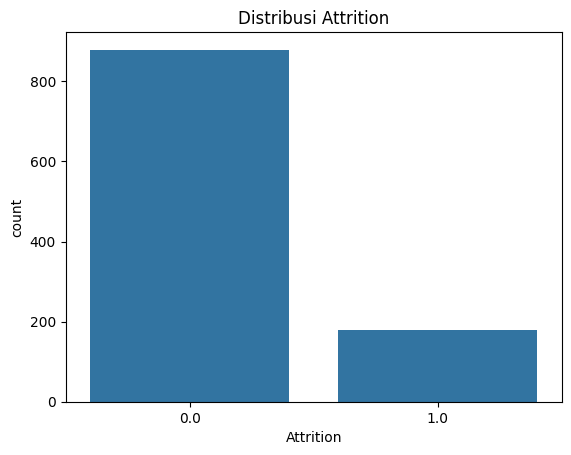

In [58]:
sns.countplot(data=df, x='Attrition')
plt.title("Distribusi Attrition")
plt.show()

In [59]:
print("Persentase Attrition:\n", df['Attrition'].value_counts(normalize=True))

Persentase Attrition:
 Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


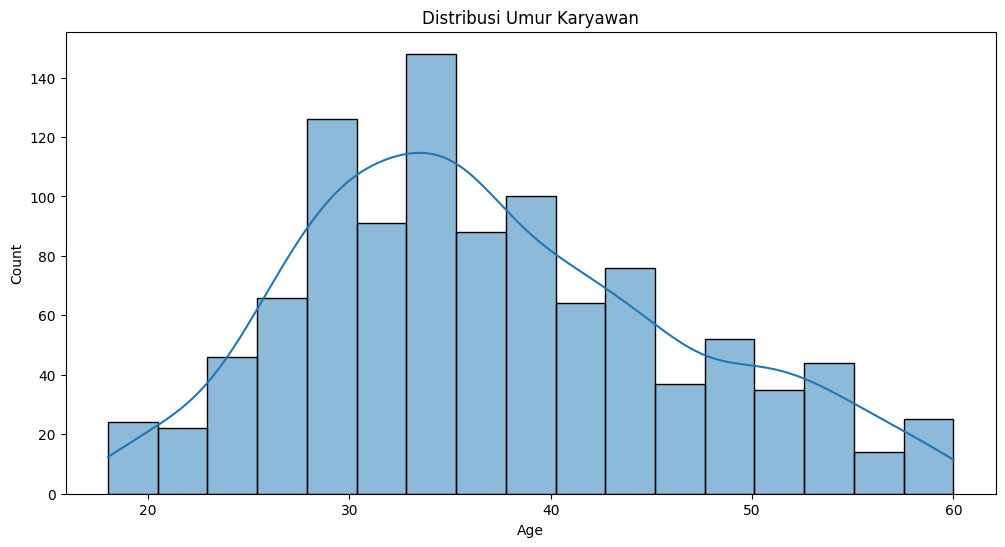

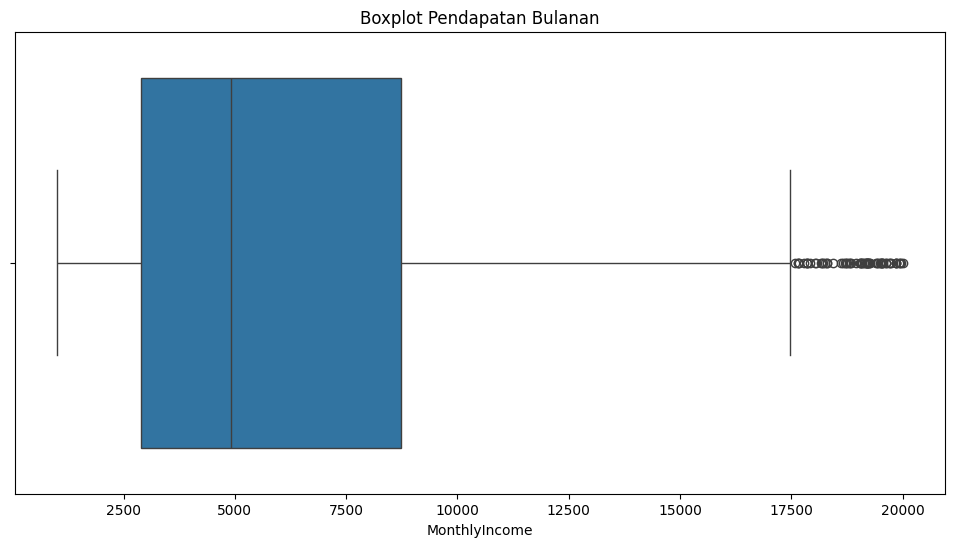

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Umur Karyawan')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Boxplot Pendapatan Bulanan')
plt.show()

In [61]:
print("Skewness of Age:", df['Age'].skew())
print("Kurtosis of Age:", df['Age'].kurtosis())

Skewness of Age: 0.40434396817823415
Kurtosis of Age: -0.47818628058931534


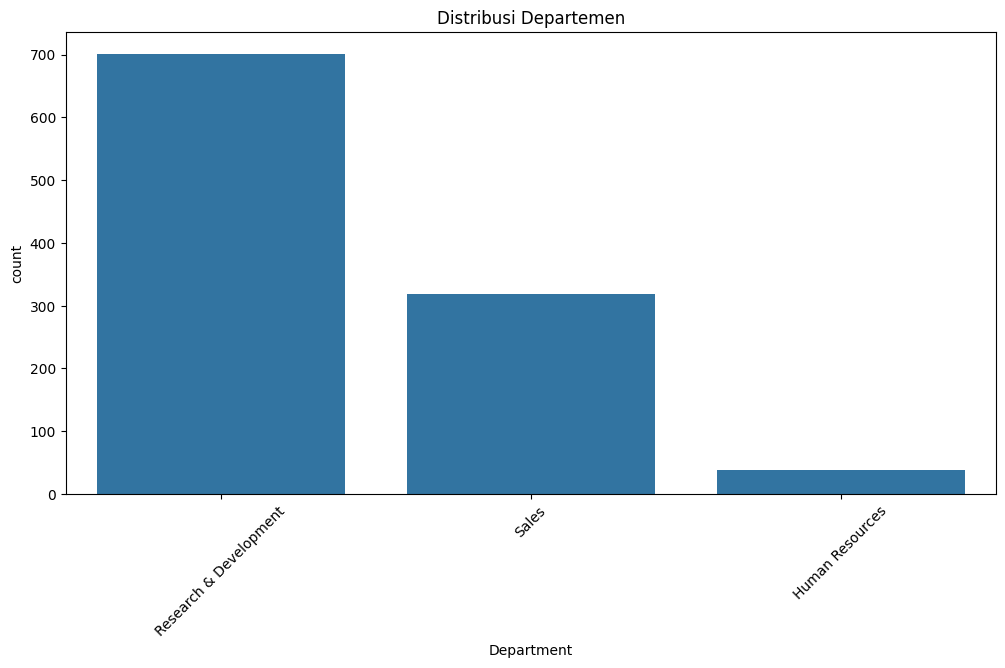

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='Department')
plt.title('Distribusi Departemen')
plt.xticks(rotation=45)
plt.show()

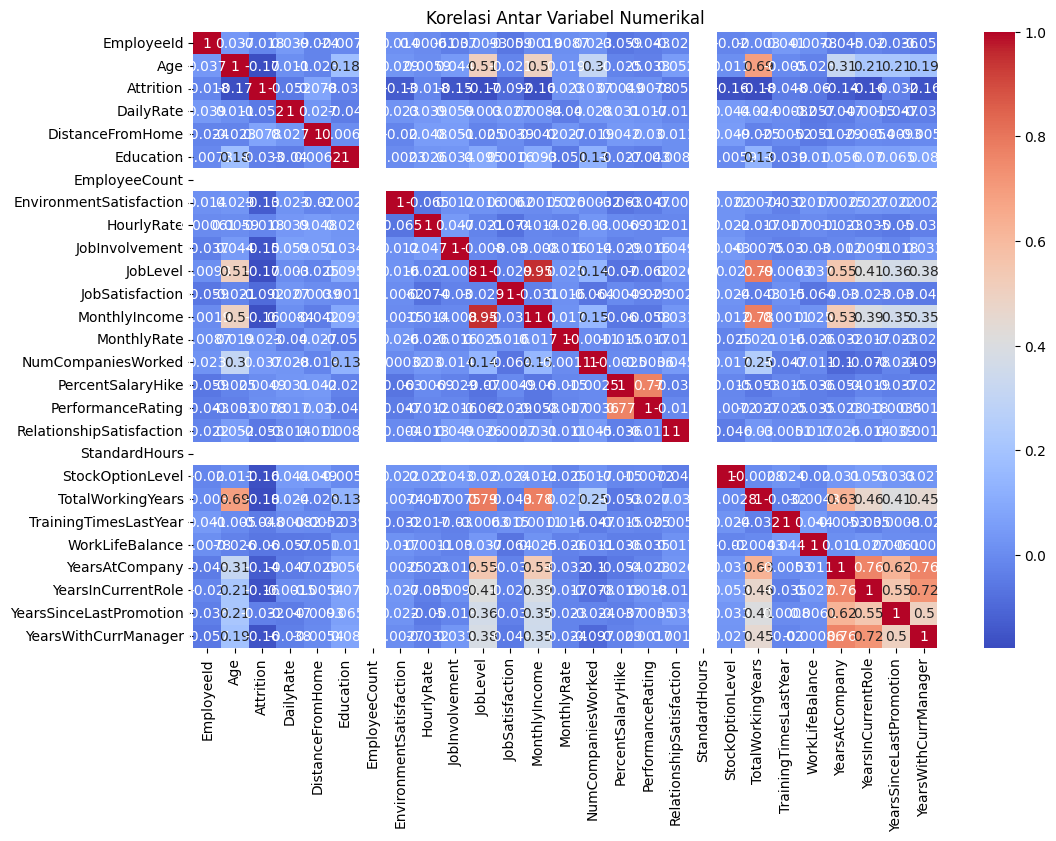

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerikal')
plt.show()

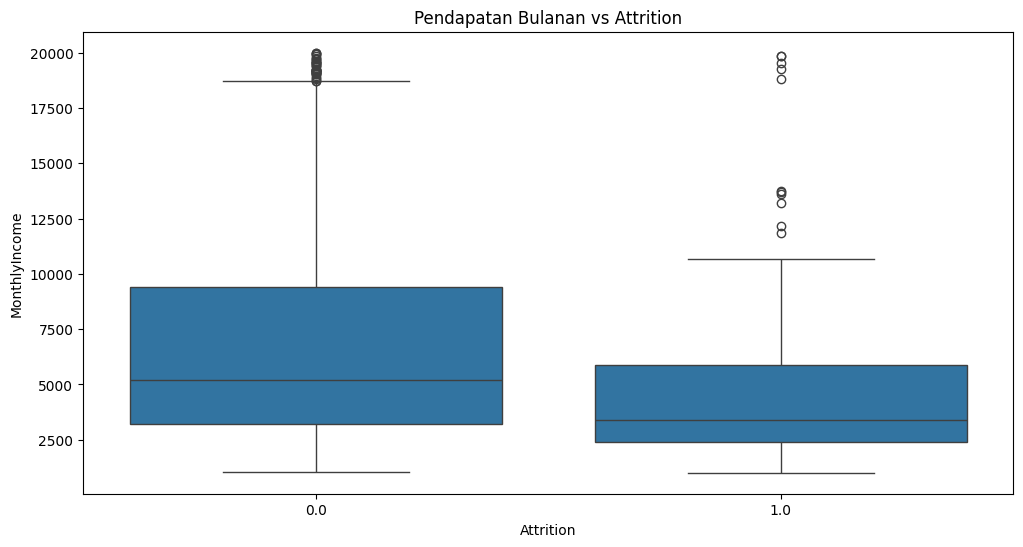

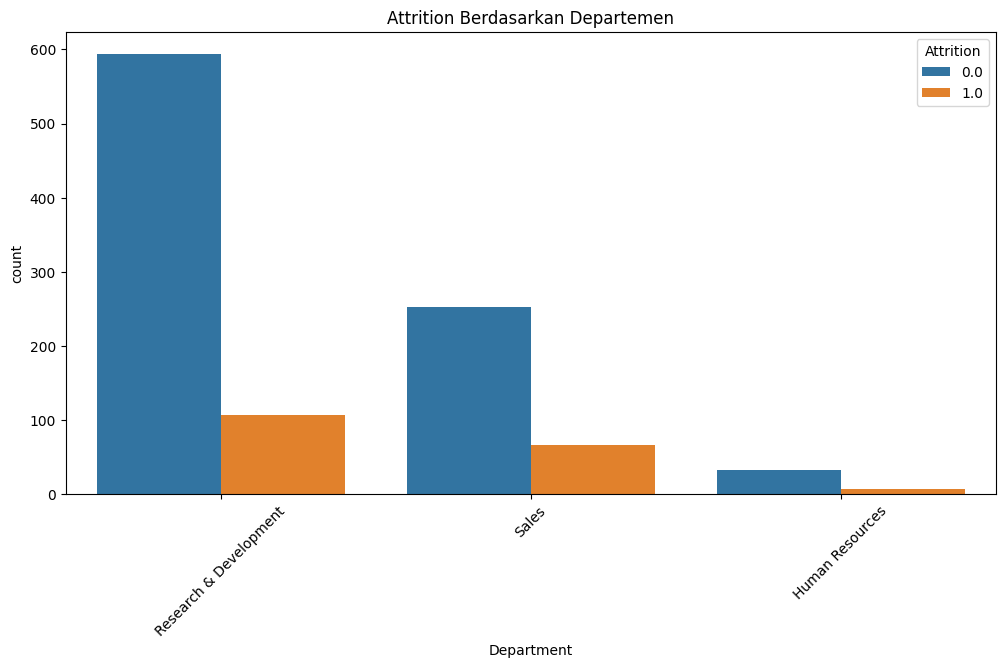

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_original)
plt.title('Pendapatan Bulanan vs Attrition')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=df_original)
plt.title('Attrition Berdasarkan Departemen')
plt.xticks(rotation=45)
plt.show()

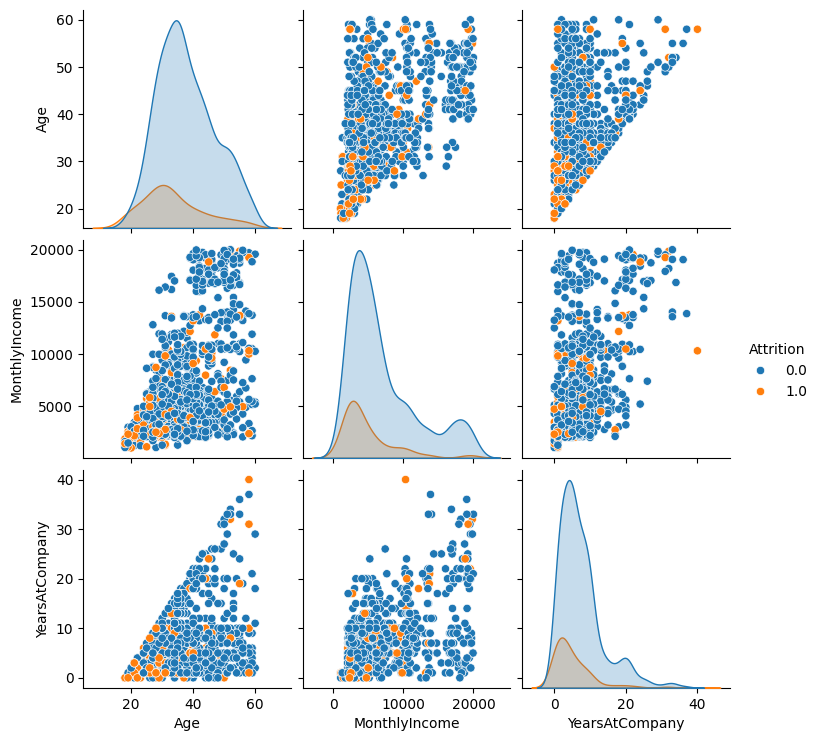

In [65]:
sns.pairplot(df_original[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue='Attrition')
plt.show()

In [66]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MonthlyIncome'] < (Q1 - 1.5 * IQR)) | (df['MonthlyIncome'] > (Q3 + 1.5 * IQR))]
print("Jumlah outlier di MonthlyIncome:", len(outliers))

Jumlah outlier di MonthlyIncome: 64


In [67]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_original['Department'], df_original['Attrition'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test untuk Department vs Attrition: p-value = {p}")

Chi-Square Test untuk Department vs Attrition: p-value = 0.0989004560487226


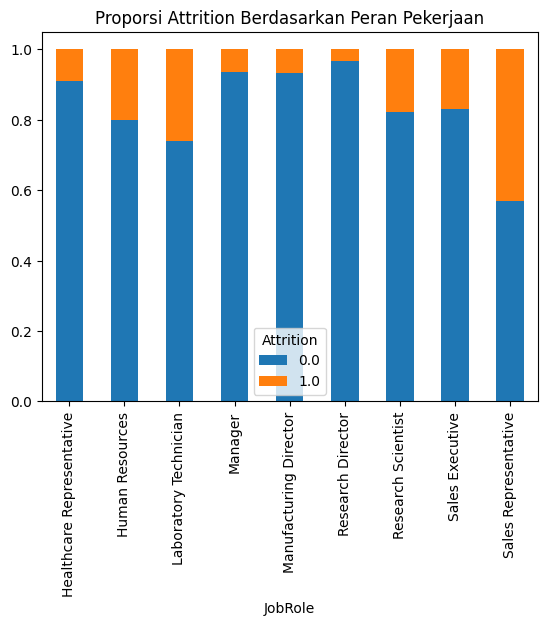

In [68]:
pd.crosstab(df_original['JobRole'], df_original['Attrition'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proporsi Attrition Berdasarkan Peran Pekerjaan')
plt.show()

## 3. Data Preparation / Preprocessing

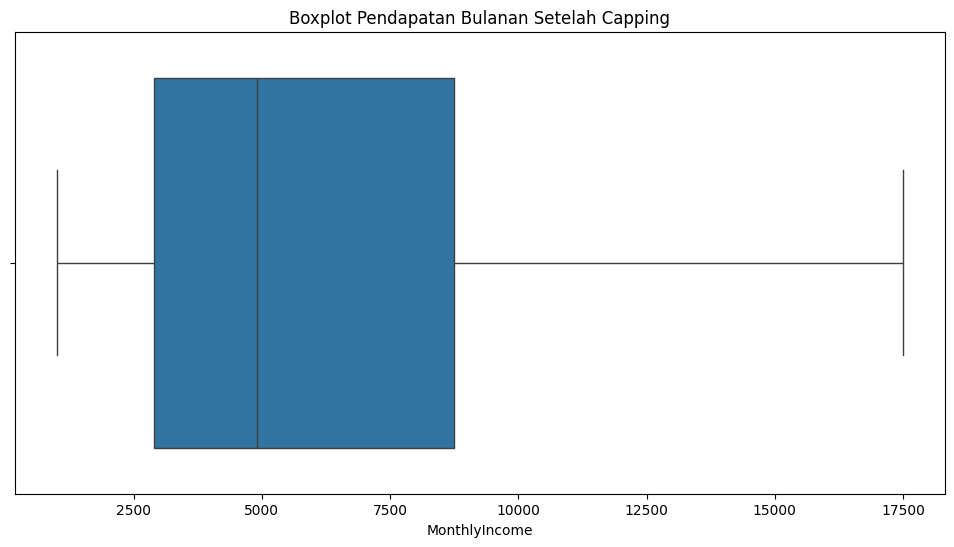

Jumlah outlier setelah capping: 0


In [69]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['MonthlyIncome'] = df['MonthlyIncome'].clip(lower=lower_bound, upper=upper_bound)
df_original['MonthlyIncome'] = df_original['MonthlyIncome'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Boxplot Pendapatan Bulanan Setelah Capping')
plt.show()

print("Jumlah outlier setelah capping:",
      len(df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]))

In [70]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [71]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,2,1141,1,11,2,3,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,2,1124,2,1,2,3,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,2,725,1,2,3,3,1,...,4,80,1,24,2,3,5,2,1,4


## 4. Modeling

In [72]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("\nJumlah data setelah SMOTE:", X_resampled.shape)


Jumlah data setelah SMOTE: (1406, 34)


In [75]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

## 5. Evaluation

In [76]:
y_pred_train = model.predict(X_resampled)
training_accuracy = accuracy_score(y_resampled, y_pred_train)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 1.0


In [77]:
y_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy}")

Testing Accuracy: 0.8349056603773585


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       176
         1.0       0.52      0.39      0.44        36

    accuracy                           0.83       212
   macro avg       0.70      0.66      0.67       212
weighted avg       0.82      0.83      0.83       212



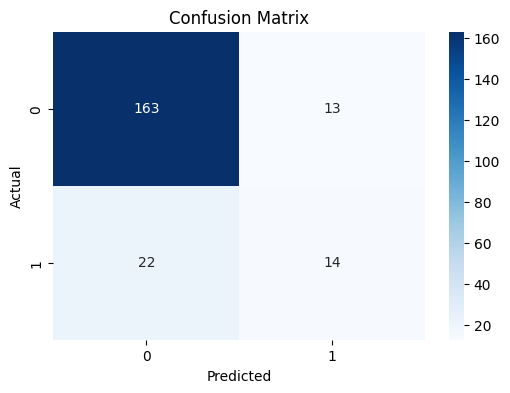

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [80]:
importances = model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

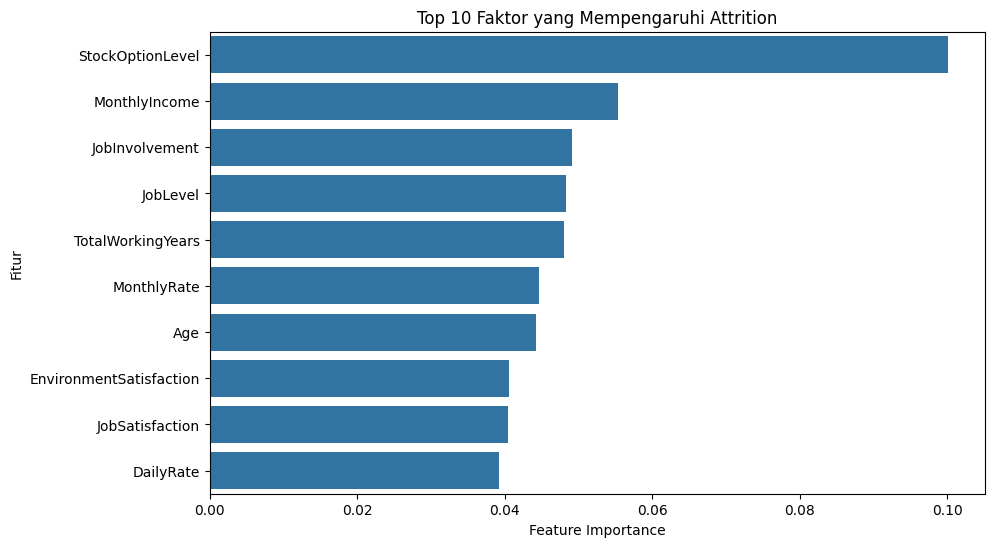

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title("Top 10 Faktor yang Mempengaruhi Attrition")
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.show()

In [82]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

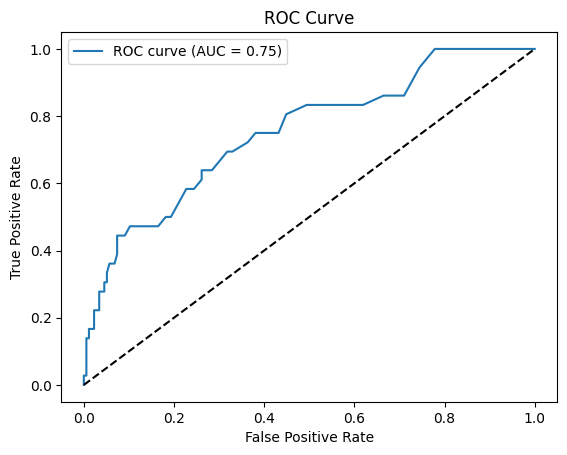


AUC-ROC Score: 0.7513415404040404


In [83]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("\nAUC-ROC Score:", roc_auc)

In [84]:
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')
print("Cross-validation F1 scores:", scores)
print("Mean F1 Score:", scores.mean())

Cross-validation F1 scores: [0.73043478 0.9556314  0.95070423 0.93559322 0.95470383]
Mean F1 Score: 0.905413492073962


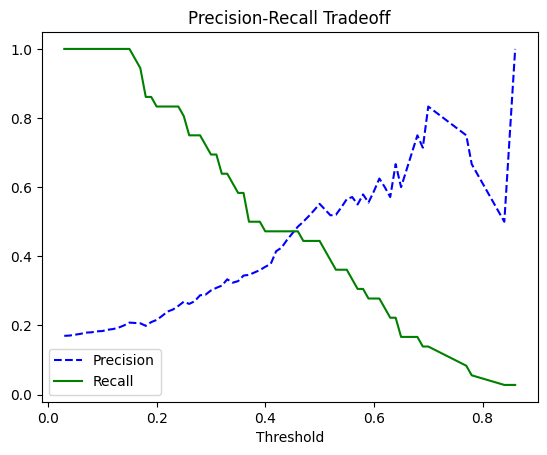

In [85]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.show()

In [86]:
joblib.dump(model, 'attrition_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Model dan encoder berhasil disimpan.")

Model dan encoder berhasil disimpan.


In [87]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

df_result = X_test.copy()
df_result['Actual_Attrition'] = y_test.values
df_result['Predicted_Attrition'] = y_pred
df_result['Attrition_Probability'] = y_pred_proba

In [88]:
test_indexes = X_test.index
original_test_data = df_original.loc[test_indexes].copy()

In [89]:
final_result = pd.concat([
    original_test_data.reset_index(drop=True),
    df_result[['Actual_Attrition', 'Predicted_Attrition', 'Attrition_Probability']].reset_index(drop=True)
], axis=1)

In [90]:
final_result.to_csv('hasil_prediksi_attrition_data.csv', index=False)

In [91]:
!pip install sqlalchemy psycopg2

In [93]:
from sqlalchemy import create_engine

engine = create_engine('postgresql://postgres.oycediczwguahrhrrtcm:Jaya_Jaya_Maju:Dicoding@aws-0-ap-southeast-1.pooler.supabase.com:6543/postgres')

final_result.to_sql('attrition_predictions_data', engine, if_exists='replace', index=False)

212